## Import Libraries

In [1]:
import os
import pokereval
import scipy.misc
#IPython Command
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#We have called a function
pe = pokereval.PokerEval()

In [3]:
pokereval.PokerEval?

## Define Constants

In [4]:
##Useful constants
numCards = 52
numRanks = 13
numSuits = 4
numHands = 1326
numVillainHand = 1255
##Useful lists
#Suits 
suits = ["h", 'd', 'c', 's']
ranks = ["A","K","Q","J","T","9","8","7","6","5","4","3","2"]
cards = []
for i in suits:
    for j in reversed(ranks):
        cards.append(j + i)

print(cards)

['2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', 'Th', 'Jh', 'Qh', 'Kh', 'Ah', '2d', '3d', '4d', '5d', '6d', '7d', '8d', '9d', 'Td', 'Jd', 'Qd', 'Kd', 'Ad', '2c', '3c', '4c', '5c', '6c', '7c', '8c', '9c', 'Tc', 'Jc', 'Qc', 'Kc', 'Ac', '2s', '3s', '4s', '5s', '6s', '7s', '8s', '9s', 'Ts', 'Js', 'Qs', 'Ks', 'As']


In [5]:
handAsStrings = ["Ah", "Jd"]
boardAsStrings = ["8d","6s","3h","Kd",'__']

### Demonstrating Conversion from string format to numerical format for cards

In [6]:
#Testing conversion from hand codes to numbers
# "__" represents an unknown card
pe.string2card(handAsStrings)

[12, 22]

In [7]:
#Always work with the numerical convention of cards
#Convert back at the last second
hand = pe.string2card(handAsStrings)
board = pe.string2card(boardAsStrings)

### Test for conflicts between two lists of cards

In [8]:
##Checks if there are any commonalitites between the lists
def conflicts(cards1, cards2):
    s = set()
    for i in cards1:
        s.add(i)
    for i in cards2:
        if i in s:
            return True
    return False
    

In [9]:
##Testing the conflicts function
conflicts(hand, board)
conflicts(pe.string2card(["Ah","3h"]),board)

True

## Hand vs Hand Equity Calculations
Before we are able to calculate hand vs range calcs we have to do hand vs hand

In [10]:
villainhand = pe.string2card(["As","4s"])
peresult = pe.poker_eval(game = 'holdem', pockets = [hand,villainhand], board = board)

In [11]:
peresult

{'eval': [{'ev': 931,
   'losehi': 3,
   'loselo': 0,
   'scoop': 41,
   'tiehi': 0,
   'tielo': 0,
   'winhi': 41,
   'winlo': 0},
  {'ev': 68,
   'losehi': 41,
   'loselo': 0,
   'scoop': 3,
   'tiehi': 0,
   'tielo': 0,
   'winhi': 3,
   'winlo': 0}],
 'info': (44, 0, 1)}

## Winhi (How many hands first wins)

In [12]:
peresult["eval"][0]["winhi"]

41

In [13]:
#Compute equity
def getEquityVsHand(hand, villainHand, board):
    if conflicts(hand,villainHand) or conflicts(hand,board) or conflicts(villainHand,board):
        return -1
    else:
        res = pe.poker_eval(game = 'holdem', pockets = [hand,villainHand], board = board)
        total = res["info"][0]
        wins = res["eval"][0]["winhi"]
        ties = res["eval"][0]['tiehi']
        return (float(wins) + ties/2.0)/float(total)

In [14]:
hand1 = pe.string2card(["Ah","jd"])
hand2 = pe.string2card(["4c","3s"])

In [15]:
getEquityVsHand(hand1,hand2,board)

0.13636363636363635

### Equity Array
* We will create a lookup table of all hand vs hand equity matchups

In [16]:
numpy.zeros((numHands,numHands))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
for i in range(numCards):
    for j in range(numCards):
        if i != j:
            print([cards[i],cards[j]])

['2h', '3h']
['2h', '4h']
['2h', '5h']
['2h', '6h']
['2h', '7h']
['2h', '8h']
['2h', '9h']
['2h', 'Th']
['2h', 'Jh']
['2h', 'Qh']
['2h', 'Kh']
['2h', 'Ah']
['2h', '2d']
['2h', '3d']
['2h', '4d']
['2h', '5d']
['2h', '6d']
['2h', '7d']
['2h', '8d']
['2h', '9d']
['2h', 'Td']
['2h', 'Jd']
['2h', 'Qd']
['2h', 'Kd']
['2h', 'Ad']
['2h', '2c']
['2h', '3c']
['2h', '4c']
['2h', '5c']
['2h', '6c']
['2h', '7c']
['2h', '8c']
['2h', '9c']
['2h', 'Tc']
['2h', 'Jc']
['2h', 'Qc']
['2h', 'Kc']
['2h', 'Ac']
['2h', '2s']
['2h', '3s']
['2h', '4s']
['2h', '5s']
['2h', '6s']
['2h', '7s']
['2h', '8s']
['2h', '9s']
['2h', 'Ts']
['2h', 'Js']
['2h', 'Qs']
['2h', 'Ks']
['2h', 'As']
['3h', '2h']
['3h', '4h']
['3h', '5h']
['3h', '6h']
['3h', '7h']
['3h', '8h']
['3h', '9h']
['3h', 'Th']
['3h', 'Jh']
['3h', 'Qh']
['3h', 'Kh']
['3h', 'Ah']
['3h', '2d']
['3h', '3d']
['3h', '4d']
['3h', '5d']
['3h', '6d']
['3h', '7d']
['3h', '8d']
['3h', '9d']
['3h', 'Td']
['3h', 'Jd']
['3h', 'Qd']
['3h', 'Kd']
['3h', 'Ad']
['3h', '2c']

['Qc', '7s']
['Qc', '8s']
['Qc', '9s']
['Qc', 'Ts']
['Qc', 'Js']
['Qc', 'Qs']
['Qc', 'Ks']
['Qc', 'As']
['Kc', '2h']
['Kc', '3h']
['Kc', '4h']
['Kc', '5h']
['Kc', '6h']
['Kc', '7h']
['Kc', '8h']
['Kc', '9h']
['Kc', 'Th']
['Kc', 'Jh']
['Kc', 'Qh']
['Kc', 'Kh']
['Kc', 'Ah']
['Kc', '2d']
['Kc', '3d']
['Kc', '4d']
['Kc', '5d']
['Kc', '6d']
['Kc', '7d']
['Kc', '8d']
['Kc', '9d']
['Kc', 'Td']
['Kc', 'Jd']
['Kc', 'Qd']
['Kc', 'Kd']
['Kc', 'Ad']
['Kc', '2c']
['Kc', '3c']
['Kc', '4c']
['Kc', '5c']
['Kc', '6c']
['Kc', '7c']
['Kc', '8c']
['Kc', '9c']
['Kc', 'Tc']
['Kc', 'Jc']
['Kc', 'Qc']
['Kc', 'Ac']
['Kc', '2s']
['Kc', '3s']
['Kc', '4s']
['Kc', '5s']
['Kc', '6s']
['Kc', '7s']
['Kc', '8s']
['Kc', '9s']
['Kc', 'Ts']
['Kc', 'Js']
['Kc', 'Qs']
['Kc', 'Ks']
['Kc', 'As']
['Ac', '2h']
['Ac', '3h']
['Ac', '4h']
['Ac', '5h']
['Ac', '6h']
['Ac', '7h']
['Ac', '8h']
['Ac', '9h']
['Ac', 'Th']
['Ac', 'Jh']
['Ac', 'Qh']
['Ac', 'Kh']
['Ac', 'Ah']
['Ac', '2d']
['Ac', '3d']
['Ac', '4d']
['Ac', '5d']
['Ac', '6d']

In [18]:
#Generates all hand vs hand equity for particular board
class EquityArray:
    #Constructor
    #Input
    #B - list of numbers representing a board
    def __init__(self, b):
        self.board = b
        self.eArray = numpy.zeros((numCards, numCards,numCards,numCards))
        if os.path.isfile(self.getFilename()):
            self.eArray = numpy.load(self.getFilename())
        else:
            self.makeArray()
    
    def makeArray(self):
        for i in range(numCards):
            for j in range(numCards):
                for a in range(numCards):
                    for b in range(numCards):
                        hand = [i,j]
                        villainHand = [a,b]
                        #Works since we can convert back and forth between numbers and cards
                        self.eArray[i][j][a][b] = getEquityVsHand(hand,villainHand,self.board)
        numpy.save(self.getFilename(),self.eArray)
                        
    
    def getFilename(self):
        boardStr = ""
        boardAsStrings = pe.card2string(self.board)
        for i in boardAsStrings:
            if i != '__':
                boardStr = boardStr + i
        if boardStr == '':
            boardStr = 'preflop'
        boardStr = boardStr + '.ea.npy'
        return boardStr
        

In [19]:
pe.card2string(board)

['8d', '6s', '3h', 'Kd', '__']

In [20]:
myEArray = EquityArray(board)

In [21]:
myEArray.getFilename()

'8d6s3hKd.ea.npy'

In [22]:
print(myEArray.eArray)

[[[[-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.          0.5        ...  0.86666667  0.06666667
     0.86666667]
   ...
   [-1.         -1.          0.86666667 ...  0.16304348  0.06666667
     0.86666667]
   [-1.         -1.          0.06666667 ...  0.06666667  0.
     0.06666667]
   [-1.         -1.          0.86666667 ...  0.86666667  0.06666667
     0.06521739]]

  [[-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   ...
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]
   [-1.         -1.         -1.         ... -1.         -1.
    -1.        ]]

  [[-1.         -1.         -1.   

In [23]:
def getEquityVsHandFast(hand, villainHand, ea):
    return ea.eArray[hand[0],hand[1],villainHand[0],villainHand[1]]

In [24]:
getEquityVsHandFast(hand,villainhand,myEArray)

0.9318181818181818

# My Class

In [25]:
#Describes a poker hand
class Range:
    def __init__(self):
            self.holdings = numpy.zeros(numCards,numCards)
    
    def getNumHands():
        sum = 0
        for i in self.holdings:
            for j in i:
                sum+=j
        return sum
    
    def containsHand(handList):
        l = pe.string2card(handList[0])
        r = pe.string2card(handList[1])
        if l >= 0 and l <= len(self.holdings) and r >= 0 and r <= len(self.holdings[0]):
            return self.holdings[l][r] > 0
    
    def changeFreq(handList,freq):
        l = pe.string2card(handList[0])
        r = pe.string2card(handList[1])
        if l >= 0 and l <= len(self.holdings) and r >= 0 and r <= len(self.holdings[0]):
            self.holdings[l][r] = freq
    
    def printRange():
        print(self.holdings)
    

# Range Class

In [26]:
pe.string2card("Ah")

12

In [27]:
def zeroHandsWithConflicts(handArray, cardslist):
    for c in cardslist:
        if c < numCards:
            handArray[c,:] = 0
            handArray[:,c] = 0

def setHandsWithConflicts(handArray, cardslist, num):
    for c in cardslist:
        if c < numCards:
            handArray[c,:] = num
            handArray[:,c] = num

#Just a special case of sethandswithconflicts where num = 0
def zeroHandsWithConflicts(handArray, cardslist):
    setHandsWithConflicts(handArray, cardslist, 0)

In [28]:
class Range:
    def __init__(self, initFrac = None):
        self.r = numpy.zeros((numCards,numCards))
        if (initFrac != None):
            for i in range(numCards):
                for j in range(i+1, numCards):
                    self.r[i][j] = initFrac
    
    #Hand represented by a list of numbers
    #Output: fraction of hand contained in range
    def getFrac(self, hand):
        card1, card2 = hand[0], hand[1]
        if card1 > card2:
            card1,card2 = card2,card1
        return self.r[card1][card2]
    
    #Number of hands
    def getNumHands(self):
        return sum(self.r)
    
    #Input: Cardslist - list of cards in numerical formmat
    #Output: the number of hand combos in the range which do not conflict with any cards in cardlist
    def getNumHandsWithoutConflicts(self, cardslist):
        temp = numpy.copy(self.r)
        self.setHandsWithConflicts(temp,cardslist)
        return sum(temp)
    
    #Removes all hands that conflict with cards list
    def setHandsWithConflicts(self, arr, cards):
        for c in cards:
            if c < numCards:
                arr[c, :] = 0
                arr[:, c] = 0
    
    #Input:
    #Hand - list of numbers describing a hand
    #Sets hand to a given fraction in range
    def setFrac(self, hand, f):
        card1, card2 = hand[0], hand[1]
        if card1 > card2:
            card1,card2 = card2,card1
        self.r[card1][card2] = f
    
    #Sets all cards in fracts to num
    def setAllFracts(self, num):
        for i in range(numCards):
            for j in range(i + 1, numCards):
                self.r[i][j] = num
    
    def scaleFracts(self, num):
        self.r = self.r * num
        
    ##RangeString: comma separated terms of form xx, xy, xys, xyo, xayb
    def setRangeString(self, rangeString, value):
            handStrs = rangeString.replace(" ","").split(',')
            for hand in handStrs:
                ##Suited and offsuit
                if len(hand) == 2:
                    rank1 = hand[0]
                    rank2 = hand[1]
                    for i in suits:
                        for j in suits:
                            if rank1 == rank2 and i == j:
                                continue #Skips body of loop
                            self.setFrac(pe.string2card([rank1 + i, rank2 + j]), value)
                ##Suited or OffSuit
                elif len(hand) == 3:
                    rank1 = hand[0]
                    rank2 = hand[1]
                    if hand[2] == 's':
                        for s in suits:
                            self.setFrac(pe.string2card([rank1 + s, rank2 + s]),value)
                    else:
                        for i in range(numSuits):
                            for j in range(i + 1, numSuits):
                                self.setFrac(pe.string2card([rank1 + suits[i], rank2 + suits[j]]), value)
                #One Combo
                elif len(hand) == 4:
                    card1 = hand[0:2]
                    card2 = hand[2:4]
                    card1 = pe.string2card(card1)
                    card2 = pe.string2card(card2)
                    self.setFrac([card1,card2],value)
               
                    print("Invalid Range Syntax")
    
    #Input:
    #Rank1 - a string specifying a rank ('2', '3', 'T', 'A')
    # Rank similar 
    #Suited - a boolean (True, False) indicating suitedness
    #Output: fraction of specified ambigious hand contained in the rank
    #If rank == (pocket pairs) suitedness = false
    def getAmbigFrac(self, rank1, rank2, suited):
        nHand = 0.0
        nFrac = 0.0
        for i in suits:
            for j in suits:
                card1 = rank1 + i
                card2 = rank2 + j
                if (suited and i !=j) or (not suited and i == j):
                    continue
                if card1 == card2:
                    continue
                nHand+=1
                nFrac+=self.getFrac(pe.string2card([card1,card2]))
        
        return nFrac / nHand
        
        
    def _repr_svg_(self):
        res = '<svg xmlns = "http://www.w3.org/2000/svg" version = "1.1" width = "260" height = "260">'
        for i in range(numRanks):
            for j in range(numRanks):
                frac = self.getAmbigFrac(ranks[i], ranks[j], i > j)
                #Represent based on darkness proportional to fraction
                hexcolor = '#%02x%02x%02x' % (255 * (1-frac),255,255*(1-frac))
                res += '<rect x="' + str(i * 20) + '" y="' + str(j * 20) + '" width="20" height = "20" fill ="'\
                       + hexcolor + '"></rect>'
                res += '<text x=' + str(i * 20) +' y='+str((j + 1) * 20) + ' font-size = 12 >' + ranks[i]\
                + ranks[j] + '</text>'
        res += '</svg>'
        return res
    
    
    #Input:
    # VillainRange - Range object
    # Board - List of 5 numbers describing a board
    #Output: List of tuples of the form (hand,  equity)
    # Where a hand is a list of intergers and equity is equity vs villainRange on board. This output list will be sorted
    #By Equity
    def getHandsSortedAndEquities(self, villainRange, board):
        ea = EquityArray(board)
        result = []
        for i in range(numCards):
            for j in range(i + 1, numCards):
                hand = [i,j]
                if not conflicts(board, hand):
                    result.append((hand,getEquityVsRange(hand, villainRange,ea)))
        result.sort(key = lambda x: x[1], reverse = 1)
        return result
    
    def setToTop(self, fraction, board):
        rangeAllHands = Range()
        rangeAllHands.setAllFracts(1.0)
        handsSorted = self.getHandsSortedAndEquities(rangeAllHands, board)
        numCardsLeft = numCards
        for c in board:
            if c < numCards:
                numCardsLeft -=1
        
        self.setAllFracts(0)
        for i in range(int(fraction * scipy.special.comb(numCardsLeft,2))):
            self.setFrac(handsSorted[i][0],1.0)
            
    #Input: cardslist - a list of cards in numerical format
    # Output: N/A
    # Side-effect: removes hands from the range with conflict
    def removeHandsWithConflicts(self, cardsList):
           pass
        

In [29]:
def getEquityVsRange(hand, r, ea):
    herocard1, herocard2 = hand
    eqs = ea.eArray[herocard1][herocard2, :, :]
    villRange = np.copy(r.r)
    zeroHandsWithConflicts(villRange, hand + ea.board)
    return sum(np.multiply(eqs, villRange)) / sum(villRange)

In [30]:
bob = Range()
bob.setAllFracts(1.0)
bob.setFrac(pe.string2card(["As","Ad"]),0.0)
bob.setFrac(pe.string2card(["As","Ah"]),0.0)
bob.setFrac(pe.string2card(["As","Ac"]),0.0)
display(bob)

In [31]:
bob = Range()
bob.setAllFracts(1.0)
getEquityVsRange(hand, bob, EquityArray(board))

0.45252525252525255

In [32]:
display(bob)

In [33]:
hand

[12, 22]

In [34]:
pe.card2string(hand)

['Ah', 'Jd']

In [35]:
bob = Range()
bob.setToTop(0.20,board)
display(bob)

In [36]:
bob = Range()
bob.setRangeString("AK,44,QJs",1.0)
display(bob)

## Plot Equity Distributions

In [37]:
#Plot Equity Distributions
plot?

In [38]:
def plotEqDistn(r1,r2,board):
    xs = []
    ys = []
    r1.getHandsSortedAndEquities(r2,board)
    handCount = 0.0
    for hand in r1.getHandsSortedAndEquities(r2,board):
        xs.append(handCount)
        handCount += r1.getFrac(hand[0])
        xs.append(handCount)
        ys.append(hand[1])
        ys.append(hand[1])
        
    plot(xs,ys)


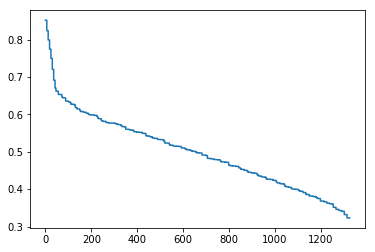

In [39]:
pfBoard = pe.string2card(["__","__","__","__","__"])
pfEArray = EquityArray(pfBoard)
ATC = Range(1.0)
plotEqDistn(ATC,ATC,pfBoard)
#ATC.getHandsSortedAndEquities(ATC,pfBoard)

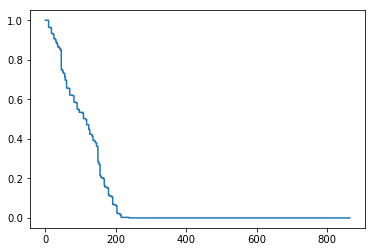

In [40]:
board = pe.string2card(["8d","6s","3h","Kd","Jd"])
ATC = Range(1.0)
r1 = Range(1.0)
r2 = Range(1.0)
r1.setToTop(0.2,board)
r2.setToTop(0.8,board)
plotEqDistn(r2,r1,board)

### The Shove Fold Game

In [41]:
#Input:
# r1 and r2 - Ranges
#n -positive integer
# Output: N/A
#Side-effect:
#Modifies r1 to incorporate
def updateRange(r1, r2, n):
    fraction = 1 - 1/(n + 2.0)
    for i in range(numCards):
        for j in range(i + 1, numCards):
            hand=[i,j]
            r1.setFrac(hand, (r1.getFrac(hand) * (fraction) + (r2.getFrac(hand)) * (1-fraction)))
            

In [42]:
def doShoveFoldGame():
    nIter = 100 #Iterations
    S = 10 # Stack size
    ea = EquityArray(pe.string2card(["__","__","__","__","__"]))
    ## Guess Inital Ranges
    sbJamRange = Range()
    sbJamRange.setAllFracts(0.5)
    bbCallRange = Range()
    bbCallRange.setAllFracts(0.5)
    
    for n in range(nIter):
        bestSBJamRange = Range()
        #Solve for sb max explt strat
        for i in range(numCards):
            for j in range(i + 1, numCards):
                hand = [i,j]
                bb_call_freq = bbCallRange.getNumHandsWithoutConflicts(hand) / numVillainHand
                equity = getEquityVsRange(hand, bbCallRange, ea)
                evJam = (1 - bb_call_freq) * (S + 1) + (bb_call_freq) * equity *2*S
                evFold = S - 0.5
                if (evJam > evFold):
                    bestSBJamRange.setFrac(hand,1)
                else:
                    bestSBJamRange.setFrac(hand, 0)
        
        #Solve for bb max expl strat
        updateRange(sbJamRange, bestSBJamRange, n)
        bestBBCallRange = Range()
        for i in range(numCards):
            for j in range(i + 1, numCards):
                hand = [i,j]
                evFold = S - 1
                evCall = 2 * S * equity
                equity = getEquityVsRange(hand, sbJamRange, ea)
                    
                if (evCall > evFold):
                    bestBBCallRange.setFrac(hand,1)
                else:
                    bestBBCallRange.setFrac(hand,0)
        
        #Update BB strat
        updateRange(bbCallRange, bestBBCallRange, n)
        display(sbJamRange)
        display(bbCallRange)
    display(sbJamRange)
    display(bbCallRange)

In [43]:
doShoveFoldGame()

In [44]:
#A decisionpoint will hold
#Player: A string describing whose decision point it is
#One of: "SB", "BB", "Nature", or "Leaf"
#Initial_sb,ci[: SB chip in pot before any decision is made at this point
#Initial_bb_cip: similar
#Array: An Equities Array describing the current board
#Parent Action: A string describing the action that got us to this point. 
#One of: "Bet", "fold", "check", "call", or board cards
#New Card Freq" Only used if parentAction was new cards being dealt.
class DecPt:
    def __init__(self, player, initial_sb_cip, initial_bb_cip, eArray, parentAction, newCardFreq = 1.0):
        self.player = player
        self.initial_sb_cip = initial_sb_cip
        self.initial_bb_cip = initial_bb_cip
        self.eArray = eArray
        self.parentAction = parentAction
        self.newCardFreq = newCardFreq
    #Player: string, that is either "sb" or "bb"
    def getPlayerCIP(self, player):
        if (player == "SB"):
            return self.initial_sb_cip
        elif (player == "BB"):
            return self.initial_bb_cip
        else:
            print("Error: Invalid Player")
        
        
    

In [45]:
#A simple approach to a tree structure:
#Put all our decision points in a list (this implicitly numbers them):
#decpoints for decision points
#Then we need to keep track of parent and child relationships
#decPts: 
class Tree:
    def __init__(self, S, root):
        self.effStack = s
        self.decPts = [] #List of all decision points
        self.children = []
        self.parents = []
        self.addDecPt(root,None)
    #Inputs: N/A
    #Outputs: number of decisionpoints in the tree
    #Side-effects: N/A
    def getNumPoints(self):
        return len(self.decPts)
    
    #Inputs: N/A
    #Outputs: Effective Stack at the beginningo of the decision tree
    def getEffStack():
        return self.effStack
    #Adds a new decision point to the tree
    #Inputs:
    #   Point: the new point not previously in the tree
    #   Parent: a decision point already in the tree
    def addDecPt(self, point, parent):
        self.decPts.append(point)
        self.children.append([])
        if (parent == None):
            self.parents.append(None)
        else:
            parentsIndex = self.decPts.index(parent)
            self.children[parentsIndex].append(self.getNumPoints() - 1)
            self.parents.append(parentsIndex)
    #Inputs: N/A
    #Outputs: returns a png file displaying the tree
    #side-effects: N/A
    def _repr_png_(self):
        g = pydot.Dot(graph_type="digraph")
        for i in range(self.getNumPoints()):
            node_label = str(i) + ': ' + self.decPts[i].player + ' (' + str(self.decPts[i].initial_sb_cip) + ',' + str(self.decPts[i].initial_bb_cip) + ')'
            node = pydot.Node('node%d'%i, label=node_label)
            g.add_node(node)
        for i in range(self.getNumPoints()):
            for j in self.children[i]:
                #print(self.decPts[j].parentAction)
                e = pydot.Edge('node%d'%i, 'node%d'%j, label=self.decPts[j].parentAction)
                g.add_edge(e)
        return g.create(g.prog, 'png')
        

In [46]:
#Pydot/graphviz
#1:Install graphviz(graphvis.org)
#2 Install pydot2
#3. change the windows path variable 
#4 restart the ypython notebook.

In [47]:
import pydot

Couldn't import dot_parser, loading of dot files will not be possible.


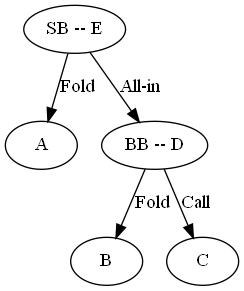

In [48]:
g = pydot.Dot(graph_type="digraph")
g.add_node(pydot.Node('pointA',label='A'))
g.add_node(pydot.Node('pointB',label='B'))
g.add_node(pydot.Node('pointC',label='C'))
g.add_node(pydot.Node('pointD',label='BB -- D'))
g.add_node(pydot.Node('pointE',label='SB -- E'))

g.add_edge(pydot.Edge('pointE','pointA',label="Fold"))
g.add_edge(pydot.Edge('pointE','pointD',label="All-in"))
g.add_edge(pydot.Edge('pointD','pointB',label="Fold"))
g.add_edge(pydot.Edge('pointD','pointC',label="Call"))

from IPython.core.display import Image
Image(g.create(g.prog,'png'))

In [49]:
s = 20
preflopEArray = EquityArray(pe.string2card(['__','__','__','__','__']))
point0 = DecPt('SB',0.5,1.0, preflopEArray, "")
point1 = DecPt('Leaf',0.5,1.0, preflopEArray, "fold")
point2 = DecPt('BB',2.0,1.0, preflopEArray, "bet")
point3 = DecPt('Leaf',2.0,1.0, preflopEArray, "fold")
point4 = DecPt('SB',2.0,20.0, preflopEArray, "bet")
point5 = DecPt('Leaf',2.0,20.0, preflopEArray, "fold")
point6 = DecPt('Leaf',20,20, preflopEArray, "call")
minrShoveTree = Tree(s,point0)
minrShoveTree.addDecPt(point1, point0)
minrShoveTree.addDecPt(point2, point0)
minrShoveTree.addDecPt(point3, point2)
minrShoveTree.addDecPt(point4, point2)
minrShoveTree.addDecPt(point5, point4)
minrShoveTree.addDecPt(point6, point4)


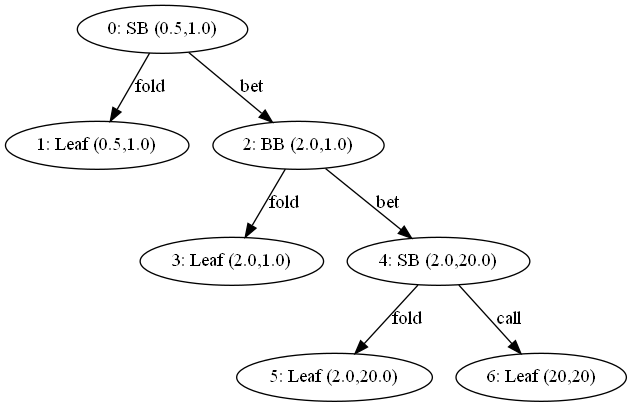

In [50]:
minrShoveTree

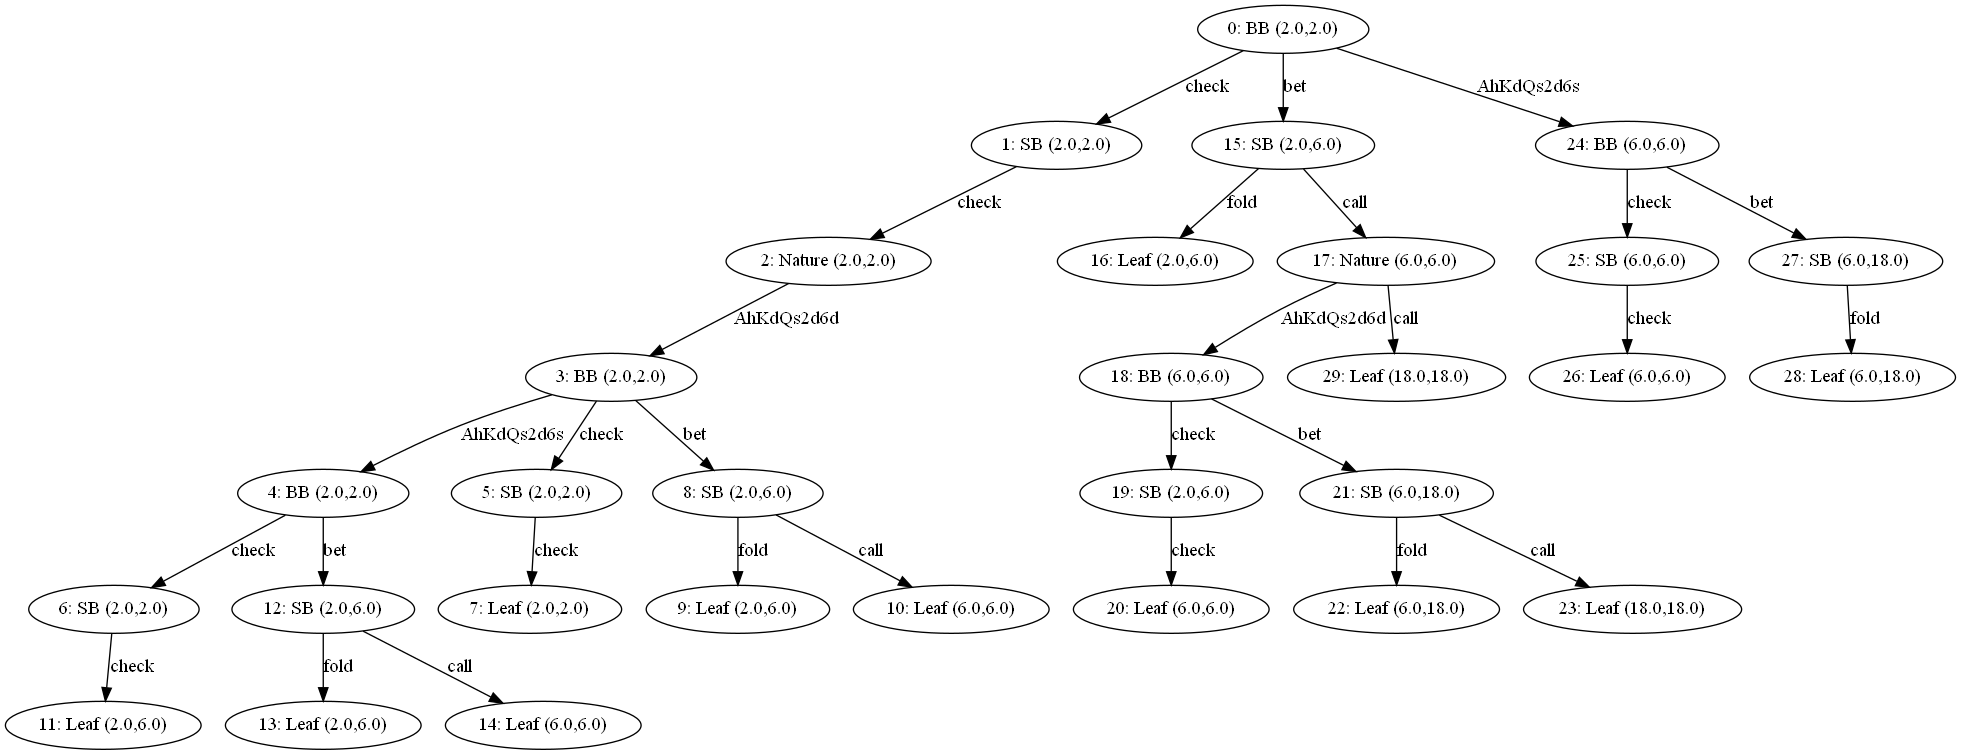

In [51]:
# Suppose SB checks back AKQr flop in a singly raisedpot. FD comes on the turn where BB is somewhat Polar
# Model this with a decision tree with two possible river cards
s = 20
turnEArray = EquityArray(pe.string2card(['Ah','Kd','Qs','2d','__']))
river1EArray = EquityArray(pe.string2card(['Ah','Kd','Qs','2d','6d']))
river2EArray = EquityArray(pe.string2card(['Ah','Kd','Qs','2d','6s']))

point0 = DecPt('BB', 2.0, 2.0, turnEArray, "")
point1 = DecPt('SB', 2.0, 2.0, turnEArray, "check")
point2 = DecPt('Nature', 2.0, 2.0, turnEArray, "check")
point3 = DecPt('BB', 2.0, 2.0, river1EArray, "AhKdQs2d6d")

point4 = DecPt('BB', 2.0, 2.0, river2EArray, "AhKdQs2d6s")
point5 = DecPt('SB', 2.0, 2.0, river1EArray, "check")
point6 = DecPt('SB', 2.0, 2.0, river2EArray, "check")

point7 = DecPt('Leaf', 2.0, 2.0, river1EArray, "check")
point8 = DecPt('SB', 2.0, 6.0, river1EArray, "bet")
point9 = DecPt('Leaf', 2.0, 6.0, river1EArray, "fold")

point10 = DecPt('Leaf', 6.0, 6.0, river1EArray, "call")
point11 = DecPt('Leaf', 2.0, 6.0, river2EArray, "check")
point12 = DecPt('SB', 2.0, 6.0, river2EArray, "bet")

point13 = DecPt('Leaf', 2.0, 6.0, river2EArray, "fold")
point14 = DecPt('Leaf', 6.0, 6.0, river2EArray, "call")
point15 = DecPt('SB', 2.0, 6.0, turnEArray, "bet")

point16 = DecPt('Leaf', 2.0, 6.0, turnEArray, "fold")
point17 = DecPt('Nature', 6.0, 6.0, turnEArray, "call")
point18 = DecPt('BB', 6.0, 6.0, river1EArray, "AhKdQs2d6d")

point19 = DecPt('SB', 2.0, 6.0, river1EArray,"check")
point20 = DecPt('Leaf', 6.0, 6.0, river1EArray, "check")
point21 = DecPt('SB', 6.0, 18.0, river1EArray, "bet")

point22 = DecPt('Leaf', 6.0, 18.0, river1EArray, "fold")
point23 = DecPt('Leaf', 18.0, 18.0, river1EArray, "call")
point24 = DecPt('BB', 6.0, 6.0, river2EArray, "AhKdQs2d6s")

point25 = DecPt('SB', 6.0, 6.0, river2EArray, "check")
point26 = DecPt('Leaf', 6.0, 6.0, river2EArray, "check")
point27 = DecPt('SB', 6.0, 18.0, river2EArray, "bet")
point28 = DecPt('Leaf', 6.0, 18.0, river2EArray, "fold")
point29 = DecPt('Leaf', 18.0, 18.0, river2EArray, "call")

T = Tree(s, point0)
T.addDecPt(point1, point0)
T.addDecPt(point2, point1)
T.addDecPt(point3, point2)
T.addDecPt(point4, point3)
T.addDecPt(point5, point3)
T.addDecPt(point6, point4)
T.addDecPt(point7, point5)
T.addDecPt(point8, point3)
T.addDecPt(point9, point8)
T.addDecPt(point10, point8) 
T.addDecPt(point11, point6)
T.addDecPt(point12, point4)
T.addDecPt(point13, point12)
T.addDecPt(point14, point12) 
T.addDecPt(point15, point0)
T.addDecPt(point16, point15)
T.addDecPt(point17, point15)
T.addDecPt(point18, point17)
T.addDecPt(point19, point18)
T.addDecPt(point20, point19)
T.addDecPt(point21, point18)
T.addDecPt(point22, point21)
T.addDecPt(point23, point21)
T.addDecPt(point24, point0)
T.addDecPt(point25, point24)
T.addDecPt(point26, point25)
T.addDecPt(point27, point24)
T.addDecPt(point28, point27)
T.addDecPt(point29, point17)
#T.addDecPt(point30, point27)

T

In [52]:
T
def solveScenario():
    doShoveFoldGame()
    

In [53]:
# StrategyPair
# Strategy: a range for every action a player can take
# Strategy pair is a pair of strategies -- one for each player
#So basically, a strategy pair  contain a range for every player action in the game
# We can keep track of all ranges by associating a range with a decision point
#Our strategy pair class will:
# - hold a tree, called tree and keep track
# - hold a starting range for both poayers
# - hold a list of ranges, called ranges, such that range[i] is the range of hands that takes
# parent action of tree.decPts[i]
# - When we make a new strategy pair we'll need to set these ranges intelligently
# - find the range that either player holds at any decision point
# - be able to display itself
# - be able to update itself (given a max exploitative range and a mixing fraction)
# - store the EVs of having any hand at any decision point
# Two three dimensional arrays
#   - number of decision points in the array by numcards
#   - The first dimension specifies a decision point
#   - The last dimension specifies the hole cards
#   - The arrays hold the EV of having a hand at a decision point
class StrategyPair:
    def __init__(self, tree, sbStartingRange = None, bbStartingRange = None):
        self.tree = tree
        self.size = self.tree.getNumPoints()
        self.ranges = [Range() for i in range(self.size)]
        self.evs = dict()
        self.evs['SB'] = numpy.zeros((self.size, numCards, numCards))
        self.evs['BB'] = numpy.zeros((self.size,numCards, numCards))
        self.sbStartingRange = sbStartingRange
        if sbStartingRange == None:
            print("here")
            self.sbStartingRange = Range(1.0)
        self.bbStartingRange = bbStartingRange
        if bbStartingRange == None:
            print("here")
            self.bbStartingRange = Range(1.0)
        #Initialize The Ranges
        self.initialize()
    
    #Inputs:
    # player: 'SB' or 'BB'
    # maxExplStrat: a dict that maps decision points numbers to ranges for all of players decision points
    # mixingFraction: a number between 0 and 1
    def updateRanges(self, player, maxExplStrat, n):
        for i in range(self.size):
            if (self.tree.decPts[i].player == player):
                for j in self.tree.children[i]:
                    updateRange(self.ranges[j], maxExplStrat[j],n)
    
    #Inputs:
    #  players: "SB" or "BB"
    # iDecPt: the number (index) of the decision point we're interested in
    #Outputs: the range the playerholds at the beginning of play at the decision point
    #Side-effects: N/A
    def getMostRecentRangeOf(self, player, iDecPt):
        iCurrDecPt = iDecPt
        while (self.tree.decPts[self.tree.parents[iCurrDecPt]].player != player):
            iCurrDecPt = self.tree.parents[iCurrDecPt]
            if iCurrDecPt == 0:
                return self.getStartingRangeOf(player)
        return self.ranges[iCurrDecPt]
    
    # Inputs: player: "SB" or "BB"
    # Outputs: the starting range of player
    # Side-effects: N/A
    def getStartingRangeOf(player):
        if player == "SB":
            return self.sStartingRange
        elif player == "BB":
            return self.bbStartingRange
        else:
            print "ERROR in StrategyPair.getStartingRangeOf: passed player: " + player
            return None
        
    #Inputs: n: a numbers
    # Outputs: the range associated with the parent action of decision point n
    # Side-effects: N/A
    def getRange(self, n):
        return self.range[n]
    
    #Inputs: N/A
    #Outputs: N/A
    #Side-effects: display all the range and actions in our tree and solution
    def dump(self):
        for i in range(1, self.size):
            parentActor = self.tree.decPts[self.tree.parents[i]].player
            action = self.tree.decPts[i].parentAction
            print str(i) + ": " + parentActor + " " + action
            if parentActor != "Nature":
                display(self.ranges[i]) 
    
    #Inputs: N/A
    #Outputs: N/A
    # Side-effects: sets all the ranges in the strategy pair, assuming players start out with starting ranges
    def initialize(self):
        self.initializeHelper(0,1.0,1.0)
    
    #Inputs:
    #   iCurrDecPt: index of the current decision point
    # Outputs: N/A
    # Side-effects: Set the range corresponding to the current decision point
    # And call itself recursively on all of the points children
    def initializeHelper(self, iCurrDecPt, sbScale, bbScale):
        children = self.tree.children[iCurrDecPt]
        numChildren = len(children)
        if self.tree.decPts[iCurrDecPt].player == 'SB':
            for iChild in children:
                self.ranges[iChild].r = self.sbStartingRange.r.copy()
                self.ranges[iChild].scaleFracts(sbScale)
                self.ranges[iChild].removeHandsWithConflicts(self.tree.decPts[iCurrDecPt].eArray.board)
        elif self.tree.decPts[iCurrDecPt].player == 'BB':
            bbScale /= numChildren
            for iChild in children: 
                self.ranges[iChild].r = self.bbStartingRange.r.copy()
                self.ranges[iChild].scaleFracts(bbScale)
                self.ranges[iChild].removeHandsWithConflicts(self.tree.decPts[iCurrDecPt].eArray.board)
        for iChild in children:
            self.initializeHelper(iChild,sbScale,bbScale)
        
        
    

In [54]:
spair = StrategyPair(minrShoveTree)
#Ispair.dump()

here
here


In [55]:
#Inputs:
#  tree: a decision tree oject
# Strats: a strategy pair
#Hero: "SB" or "BB" -- theplayer who's 
def setMaxExplEVs(tree, strats, hero, villain):
    setMaxExplEVsHelper(tree, 0, strats, hero, villain)

def setMaxExplEVsHelper(tree, iDecPt, strats, hero, villain):
    currDecPt = tree.decPts[iDecPt]
    if (currDecPt.player == 'Leaf'):
        setMaxExplEVsAtLeaf(tree, iDecPt, strats, hero, villain)
    elif (currDecPt.player == hero):
        setMaxExplEVsAtHeroDP(tree, iDecPt, strats, hero, villain)
    elif (currDecPt.player == villain):
        setMaxExplEVsAtVillainDP(tree, iDecPt, strats, hero, villain)
    else:
        setMaxExplEVsAtNatureDP(tree, iDecPt, strats, hero, villain)

#Sets the max EXPl ev at the correct node type.
def setMaxExplEVsAtLeaf(tree, iDecPt, strats, hero, villain):
    currDecPt = tree.decPts[iDecPt]
    #Fold or showdown
    if (currDecPt.parentAction == "fold"):
        if (tree.decPts[tree.parents[iDecPt]].player == hero):
            strats.evs[hero][iDecPt] = numpy.ones_like(strats.evs[hero][iDecPt]) * (tree.effStack - currDecPt.getPlayerCIP(hero))
        else:
            strats.evs[hero][iDecPt] = numpy.ones_like(strats.evs[hero][iDecPt]) * (tree.effStack + currDecPt.getPlayerCIP(hero))
    else:
        for i in range(0,numCards):
            for j in range(i+1,numCards):
                strats.evs[hero][iDecPt][i][j] = (tree.effStack - currDecPt.getPlayerCIP(hero)) + (currDecPt.getPlayerCIP(hero)+currDecPt.getPlayerCIP(villain))*getEquityVsRange([i,j],strats.getMostRecentRangeOf(villain, iDecPt), currDecPt.eArray)
    setHandsWithConflicts(strats.evs[hero][iDecPt], currDecPt.eArray.board, -1)
    
def setMaxExplEVsAtHeroDP(tree, iDecPt, strats, hero, villain):
    strats.evs[hero][iDecPt] = numpy.zeros_like(strats.evs[hero][iDecPt])
    for iChild in tree.children[iDecPt]:
        setMaxExplEVsHelper(tree, iChild, strats, hero, villain)
        strats.evs[hero][iDecPt] = numpy.maximum(strats.evs[hero][iDecPt], strats.evs[hero][iChild])
        
    
def setMaxExplEVsAtVillainDP(tree, iDecPt, strats, hero, villain):
    for iChild in tree.children[iDecPt]:
        setMaxExplEVsHelper(tree, iChild, strats, hero, villain)
    for i in range(0,numHands):
        for j in range(i+1, numCards):
            comboCounts = {}
            totalNumHandsInRange = 0
            for iChild in tree.children[iDecPt]:
                comboCounts[iChild] = strats.ranges[iChild].getNumHandsWithoutConflicts([i,j])
                totalNumHandsInRange += comboCounts[iChild]
            strats.evs[hero][iDecPt][i][j] = 0
            for iChild in tree.children[iDecPt]:
                strats.evs[hero][iDecPt][i][j] += strats.evs[hero][iChild][i][j] * (comboCounts[iChild] / totalNumHandsInRange)

def setMaxExplEVsAtNatureDP(tree, iDecPt, strats, hero, villain):
    for iChild in tree.children[iDecPt]:
        setMaxExpEVslHelper(tree, iChild, strats, hero, villain)
    villainRange = strats.getMostRecentRangeOf(villain, iDecPt)
    for i in range(0,numHands):
        for j in range(i+1,numCards):
            if conflicts([i,j], tree.decPts[iDecPt].eArray.board):
                strats.evs[hero][iDecPtr][i][j] = -1 #Mark ev as -1 to indicate an impossible situation
            else:
                comboCounts = {}
                comboSum = 0.0
            
                for iChild in tree.children[iDecPtr]:
                    newBoard = tree.decPts[iChild].eArray.board
                    if (conflicts(newBoard, [i,j])):
                        comboCounts[iChild] = 0
                    else:
                        comboCounts[iChild] = villainRange.getNumHandsWithoutConflicts([i,j]) * tree.decPts[iChild].newCardsFreq
                    comboSum += comboCounts[iChild]
                strats.evs[hero][iDecPt][i][j] = 0
                if (comboSum == 0.0):
                    strats.evs[hero][iDecPt][i][j] = -1
                else:
                    for iChild in tree.children[iDecPt]:
                        strats.evs[hero][iDecPt][i][j] += strats.evs[hero][iChild][i][j] * (comboCounts[iChild] / totalNumHandsInRange)
    
            
        

    

In [56]:
#Recallthe strategy pair object, array/evs/playeretc
#Inputs: tree, hero,
#stratPair: a strategy pair object
#outputs a dictionary mapping decision point indices to ranges
def getMaxEVStrat(tree, hero, stratpair):
    result = []
    if hero == "SB":
        getMaxEVStratHelper(tree, hero, stratpair, 0, stratpair.sbStartingRange, result)
    elif hero == "BB":
        getMaxEVStratHelper(tree,hero,stratpair, 0, stratpair,bbStartingRange, result)
    else:
        print "Error in getMaxEVStrat()"
    return result


#Traverse whole tree
# Tree: decision tree
#Hero: "SB" or "BB"
#Stratpair: a strategyPair containing max exploitative EV's
# IcurrDecPt: index of currently-under-consideration decision point
def getMaxEVStratHelper(tree, hero, stratpair, iCurrDecPt, currRange, result):
    currDecPt = tree.decPts[iCurrDecPt]
    if currDecPt.player == hero:
        for iChild in tree.children[iCurrDecPt]:
            result[iChild] = Range()
        for i in range(0,numCards):
            for j in range(i+1,numCards):
                if currRange.r[i][j] > 0:
                    iMaxEV = 0 #Index of max EV child action
                    maxEV = -1
                    for k in tree.children[iCurrDecPt]:
                        if (stratpair.evs[hero][k][i][j] > maxEV):
                            maxEV = stratpair.evs[hero][k][i][j]
                            iMaxEV = k
                    if (maxEV >= 0):
                        result[iMaxEV].setFrac([i,j],currRange.r[i][j])
        for iChild in tree.children[iCurrDecPt]:
            getMaxEVStratHelper(tree, hero, stratpair, iChild, result[iChild], result)
    else:
        for iChild in tree.children[iCurrDecPt]:
            getMaxEVStratHelper(tree,hero,stratpair,iChild,currRange,result)

In [57]:
#Inputs:
#    tree: a Tree that we're going tos olve
#    nIter: number of iterations to run for
#    sbStartingRange and bbStartingRange: optional, range objects
def doFP(tree,nIter,sbStartingRange = None,bbStartingRange = None):
    #Initialize guess at strategies for both players
    strats = StrategyPair(tree, sbStartingRange, bbStartingRange)
    for i in range(1, nIter+1):
        print i
        setMaxExplEVs(tree, strats, "SB", "BB")
        sbMaxEVStrat = getMaxEVStrat(tree, "SB", strats)
        strats.updateRanges("SB", sbMaxEVStrat, i)
        
        setMaxExpltEVs(tree, strats, "BB", "SB")
        sbMaxEVStrat = getMaxEVStrat(tree, "BB", strats)
        strats.updateRanges("BB", bbMaxEVStrat, i)
    return strats
    

In [58]:
soln = doFP(minrShoveTree, 100)

here
here
1


IndexError: list assignment index out of range